In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1', usecols=[0, 1])

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)

In [5]:
df.shape

(5572, 2)

In [6]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
df.describe().transpose()

,count,unique,top,freq
label,5572,2,ham,4825
text,5572,5169,"Sorry, I'll call later",30


In [9]:
df.duplicated().sum()

403

In [10]:
df = df.drop_duplicates(keep= 'first')

In [11]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.groupby('label').describe().transpose()

label                                                      ham  \
text count                                                4516   
     unique                                               4516   
     top     Go until jurong point, crazy.. Available only ...   
     freq                                                    1   

label                                                     spam  
text count                                                 653  
     unique                                                653  
     top     Free entry in 2 a wkly comp to win FA Cup fina...  
     freq                                                    1

In [13]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

<Axes: ylabel='count'>

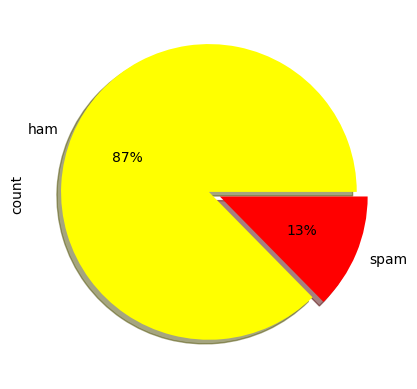

In [15]:
plot_df = df.label.value_counts()
colors = ['yellow','red']
explode = (0.04 , 0.04)
plot_df.plot(kind = "pie" ,shadow = True, explode=explode, colors=colors,autopct='%1.0f%%')

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df.loc[df['label'] == 'spam' , 'label'] = 1
df.loc[df['label'] == 'ham' , 'label'] = 0

In [20]:
df_largest = df[df['label'] ==0]
df_smallest = df[df['label']==1]

In [23]:
df_smallest_unsampled = resample(df_smallest , replace=True , n_samples=4825 , random_state=0)
df = pd.concat([df_largest , df_smallest_unsampled])

In [24]:
df['label'].value_counts()

label
1    4825
0    4516
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

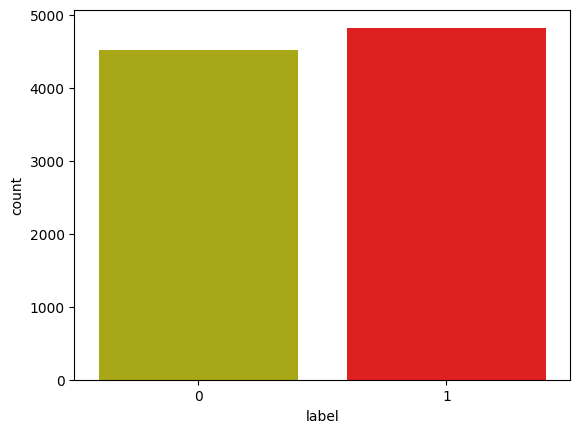

In [39]:
sns.countplot(x='label' , data=df , palette=['y','r'])

In [25]:
X = df['text']
y = df['label']

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 0)

In [27]:
vect = TfidfVectorizer(min_df=1, stop_words='english' , lowercase=True)

In [28]:
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [29]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [30]:
model = MultinomialNB()

In [31]:
model.fit(X_train_vect , y_train)

MultinomialNB()

In [32]:
y_pred = model.predict(X_test_vect)

In [33]:
accuracy_score(y_test, y_pred)

0.9775280898876404

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(X_train_vect, y_train)

LogisticRegression()

In [37]:
y_pred=model.predict(X_test_vect)

In [38]:
accuracy_score(y_test, y_pred)

0.9957196361690743